### Data 가져오기

송영숙님 한글 챗봇 데이터 : https://github.com/songys/Chatbot_data 

### Pakage Import 하기

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

from functools import reduce
from wordcloud import WordCloud
%matplotlib inline

### konlpy Install 하기

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 4.7MB/s 
     |████████████████████████████████| 2.7MB 40.5MB/s 


In [0]:
from konlpy.tag import Okt

In [0]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'

In [7]:
!rm -rf data_in;rm -rf data_out;ls;

sample_data


### data input & data output 폴더 구성

In [0]:
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)

In [23]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Data/'

total 246339
-rw------- 1 root root    889842 Jun 28 04:08 ChatBotData.csv
-rw------- 1 root root  63160167 Jun 22 04:45 rnn_predict.csv
-rw------- 1 root root   5190322 May 12 08:17 sample_submission.csv.zip
-rw------- 1 root root  42874600 Jun 21 04:42 simple_xgb.csv
-rw------- 1 root root 117931806 May 12 08:18 test.csv.zip
-rw------- 1 root root  22202741 May 12 08:17 train.csv.zip


###  데이터 준비하기

In [25]:
!wget -P '/content/gdrive/My Drive/Colab Notebooks/Data/' https://raw.githubusercontent.com/changwookjun/learningspoons/master/Data/ChatBotData.csv

--2019-06-28 04:11:04--  https://raw.githubusercontent.com/changwookjun/learningspoons/master/Data/ChatBotData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 889842 (869K) [text/plain]
Saving to: ‘/content/gdrive/My Drive/Colab Notebooks/Data/ChatBotData.csv.1’

ChatBotData.csv.1   100%[===================>] 868.99K  --.-KB/s    in 0.07s   

2019-06-28 04:11:04 (11.5 MB/s) - ‘/content/gdrive/My Drive/Colab Notebooks/Data/ChatBotData.csv.1’ saved [889842/889842]



In [26]:
!ls -al '/content/gdrive/My Drive/Colab Notebooks/Data/'

total 247208
-rw------- 1 root root    889842 Jun 28 04:08 ChatBotData.csv
-rw------- 1 root root    889842 Jun 28 04:11 ChatBotData.csv.1
-rw------- 1 root root  63160167 Jun 22 04:45 rnn_predict.csv
-rw------- 1 root root   5190322 May 12 08:17 sample_submission.csv.zip
-rw------- 1 root root  42874600 Jun 21 04:42 simple_xgb.csv
-rw------- 1 root root 117931806 May 12 08:18 test.csv.zip
-rw------- 1 root root  22202741 May 12 08:17 train.csv.zip


In [27]:
!cp '/content/gdrive/My Drive/Colab Notebooks/Data/ChatBotData.csv' ./data_in/ChatBotData.csv;ls -al ./data_in/

total 884
drwxr-xr-x 2 root root   4096 Jun 28 04:09 .
drwxr-xr-x 1 root root   4096 Jun 28 04:03 ..
-rw------- 1 root root 889842 Jun 28 04:11 ChatBotData.csv


### EDA 시작

In [0]:
data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')

In [33]:
data.shape

(11823, 3)

In [34]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [51]:

sentences = list(data['Q']) + list(data['A'])
sentences[1]

'1지망 학교 떨어졌어'

In [52]:
len(sentences)

23646

In [53]:
tokenized_sentences = [s.split() for s in sentences]
tokenized_sentences[1]

['1지망', '학교', '떨어졌어']

In [54]:
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_token[1]

3

In [55]:
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]
sent_len_by_eumjeol[1]

9

In [57]:
okt = Okt()
morph_tokenized_sentences = [okt.morphs(s) for s in sentences]
morph_tokenized_sentences[1]

['1', '지망', '학교', '떨어졌어']

In [58]:
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]
sent_len_by_morph[1]

4

Text(0, 0.5, 'Number of Sentences')

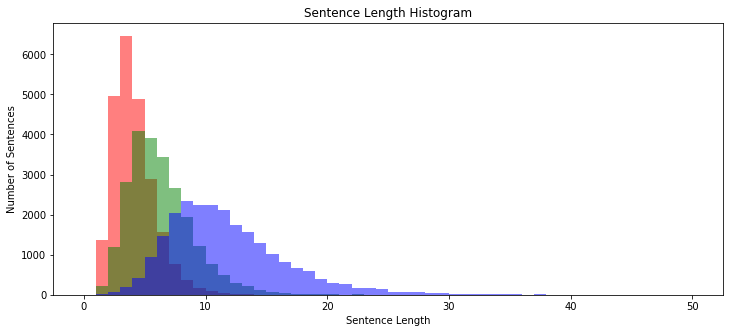

In [59]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

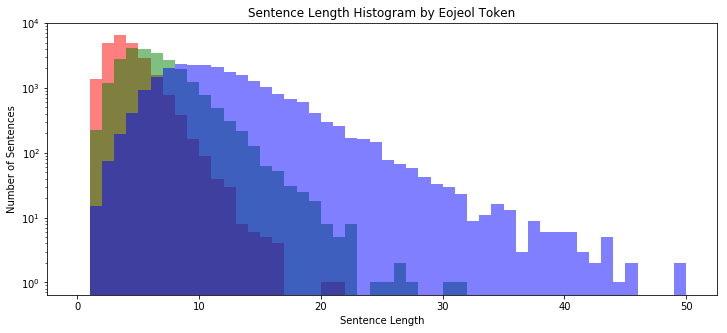

In [60]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [61]:
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [62]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.83
형태소 길이 표준편차: 2.71
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


In [63]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1/4 퍼센타일 길이: 8.0
음절 3/4 퍼센타일 길이: 14.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fabbde44710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fabbde44f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fabbdddec50>,
 'means': [<matplotlib.lines.Line2D at 0x7fabbddde940>,
 'medians': [<matplotlib.lines.Line2D at 0x7fabbddde5f8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fabbde44860>,
  <matplotlib.lines.Line2D at 0x7fabbddf9198>]}

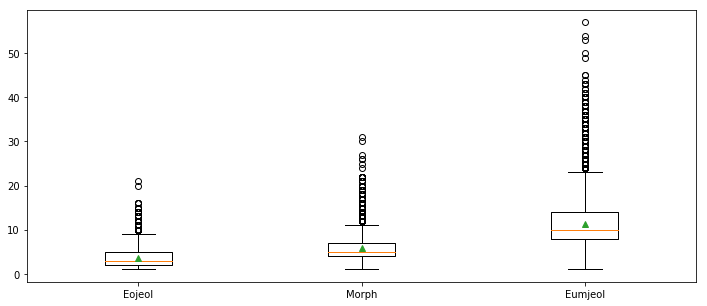

In [64]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

In [0]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

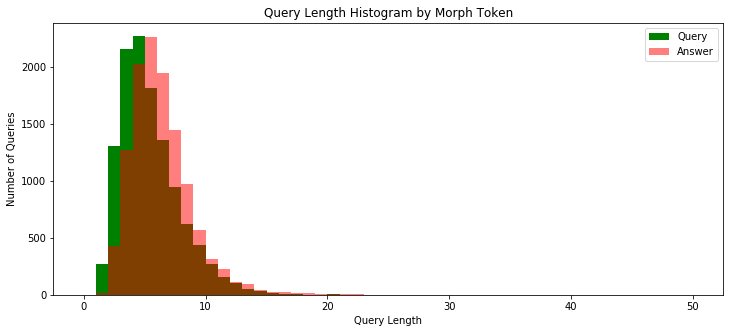

In [66]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0, 0.5, 'Number of Queries')

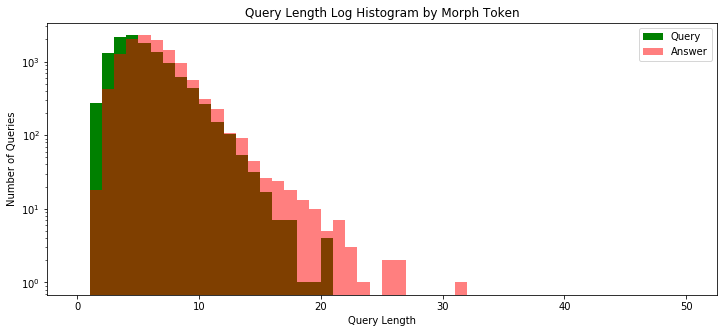

In [67]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

### 질문 분석

In [68]:
print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

형태소 최대길이: 20
형태소 최소길이: 1
형태소 평균길이: 4.95
형태소 길이 표준편차: 2.48
형태소 중간길이: 4.0
형태소 1/4 퍼센타일 길이: 3.0
형태소 3/4 퍼센타일 길이: 6.0


### 답변 분석

In [69]:
print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.87
형태소 길이 표준편차: 2.55
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


### 형태소 분석

In [70]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [0]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

### wordcloud  만들기

In [72]:
!apt-get update -qq #나눔고딕 인스톨
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [73]:
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name() # 나눔글꼴을 깔았으니 한번 설정해보자
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
fm._rebuild() 

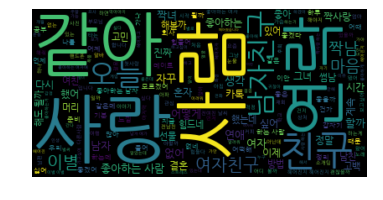

In [75]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

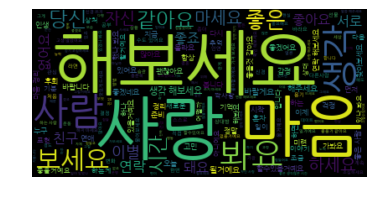

In [77]:
answer_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()